# **_Building Intuition Around PDFs and CDFs_**

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

This Python Jupyter Notebook includes my solution to a assignment from the **Probability Theory** section of Mike X. Cohen's Statistics & Machine Learning course on Udemy, along with some other code/analysis I wrote.

-   Udemy course: https://www.udemy.com/course/statsml_x

-   Mike X. Cohen's website: https://www.mikexcohen.com

Creating this notebook provides me with the opportunity to review by explaining what I learned in my own words, provides a handy quick-reference.

If you see any errors/problems, please let me know.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Goal:_**

Take a distribution, calculate and plot some **PROBABILITY DENSITY FUNCTIONS**. Compare with their respective **CUMULATIVE DISTRIBUTION FUNCTIONS**.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Review of Core Concepts:_**

### **_Probability Mass vs. Probability Density:_**

When analyzing **discrete** data use a **PROBABILITY MASS FUNCTION (PMF)**.

When analyzing **continuous** data use a **PROBABILITY DENSITY FUNCTION (PDF)**.

A PDF doesn't assign probability to specific points as the probability of any single value in a continuous distribution can be measured to an infinitely small degree and therefore is technically zero. Instead, a PDF describes how **LIKELY** values are to occur within **RANGES** — effectively "binning" the continuous data to estimate probabilities over intervals.

#### **_Examples of Continuous Data:_**

These are measurements that can take on **INFINITELY** many values within any range:

-   **_Age of a Tree:_** Whether it's `100`, `100.1`, or `100.01` years — time is continuous.
    You can group age into bins (by decade, year, etc.) to estimate probabilities.

-   **_Distance of a Satellite from Earth:_** _Iridium Next 103_'s perigee is approximately `610 km`, but really it's `610.xxx km`. That precision goes as deep as your instruments allow.

-   **_Amount of Oxygen in a Cubic Foot of Air:_** A real value that can vary continuously with temperature, pressure, etc...

#### **_Examples of Discrete Data:_**

Discrete values are **COUNTABLE** — there's no in-between:

-   **_Number of Fingers on a Hand_**: You either have `5`, `4`, `3`, `2`, `1`, or `0`. There’s no such thing as `4.3` fingers, unless your analysis includes the lengths of congenitally anomalous or partially amputated digits, in which case it becomes a continuous variable.

-   **_Outcome of a Sports Match:_** `win`, `lose`, or `tie` — a finite set of options.

-   **_Roulette Spin Result:_** `Red` or `black`. `1` to `36`, or `0`. No decimals, nothing in between.

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 80%;">

### **_How PDFs and CDFs Relate to Probability:_**

#### **_Probability Density Function (PDF):_**

When working with continuous data, a **PROBABILITY DENSITY FUNCTION (PDF)** describes where values are more or less likely to occur.

But the probability of any exact value is always `0` in a continuous distribution, since the data allows for infintely small measurements. 

Therefore probability of continuous data is measured over a **RANGE** by measuring the area **UNDER** the PDF curve between _two points_:

$$
\Large
P(a \leq X \leq b) = \int_a^b \text{pdf}(x) dx
$$

**_n.b._**

-   **PDF y-height at x axis point $\neq$ probability**

-   **PDF area under curve within a range $=$ probability**

<font size=5 style="color: orangered; font-weight: 400; text-shadow: goldenrod 0.05rem -0.05rem 0.65rem;">

**PDF `y` height at `x`-axis point $\neq$ probability.**

**PDF area under curve within a range $=$ probability.**

</font>

#### **_Cumulative Distribution Function (CDF):_**

The CDF shows the total probability accumulated from the far left up to any point `x`:

$$
CDF(x) = \int_{-\infty}^x \text{pdf}(t) \; dt
$$

**_Syntax:_**

-   $\text{cdf}(5.0)$ = total probability that $x \leq 5.0$

-   $1 - \text{cdf}(5.0)$ = probability that $x > 5.0$

-   $\text{cdf}(b) - \text{cdf}(a)$ = probability that $x \in [a, b]$

The CDF is a "running total" of probability — smooth, continuous, always increasing.

This notebook doesn't calculating those probabilities directly. My purpose here is to visualize PDFs and CDFs side by side to understand their shapes and to build intuition around these concepts.

#### **_Overview:_**

<font size=5 style="color: orangered; font-weight: 400; text-shadow: goldenrod 0.05rem -0.05rem 0.65rem;">

The PDF describes **DENSITY**.

The CDF describes **ACCUMULATED LIKELIHOOD**.

</font>

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_The Code:_**

Parameters used in this analysis: {'lognorm_s': 0.82, 'genh_a': 4.25, 'genh_b': 1.79, 'genh_p': 0.8, 'dwei_c': 3.08, 't_df': 1.49, 'f_dfn': 7, 'f_dfd': 14, 'hc_loc': 1.64, 'hc_scale': 2.36}


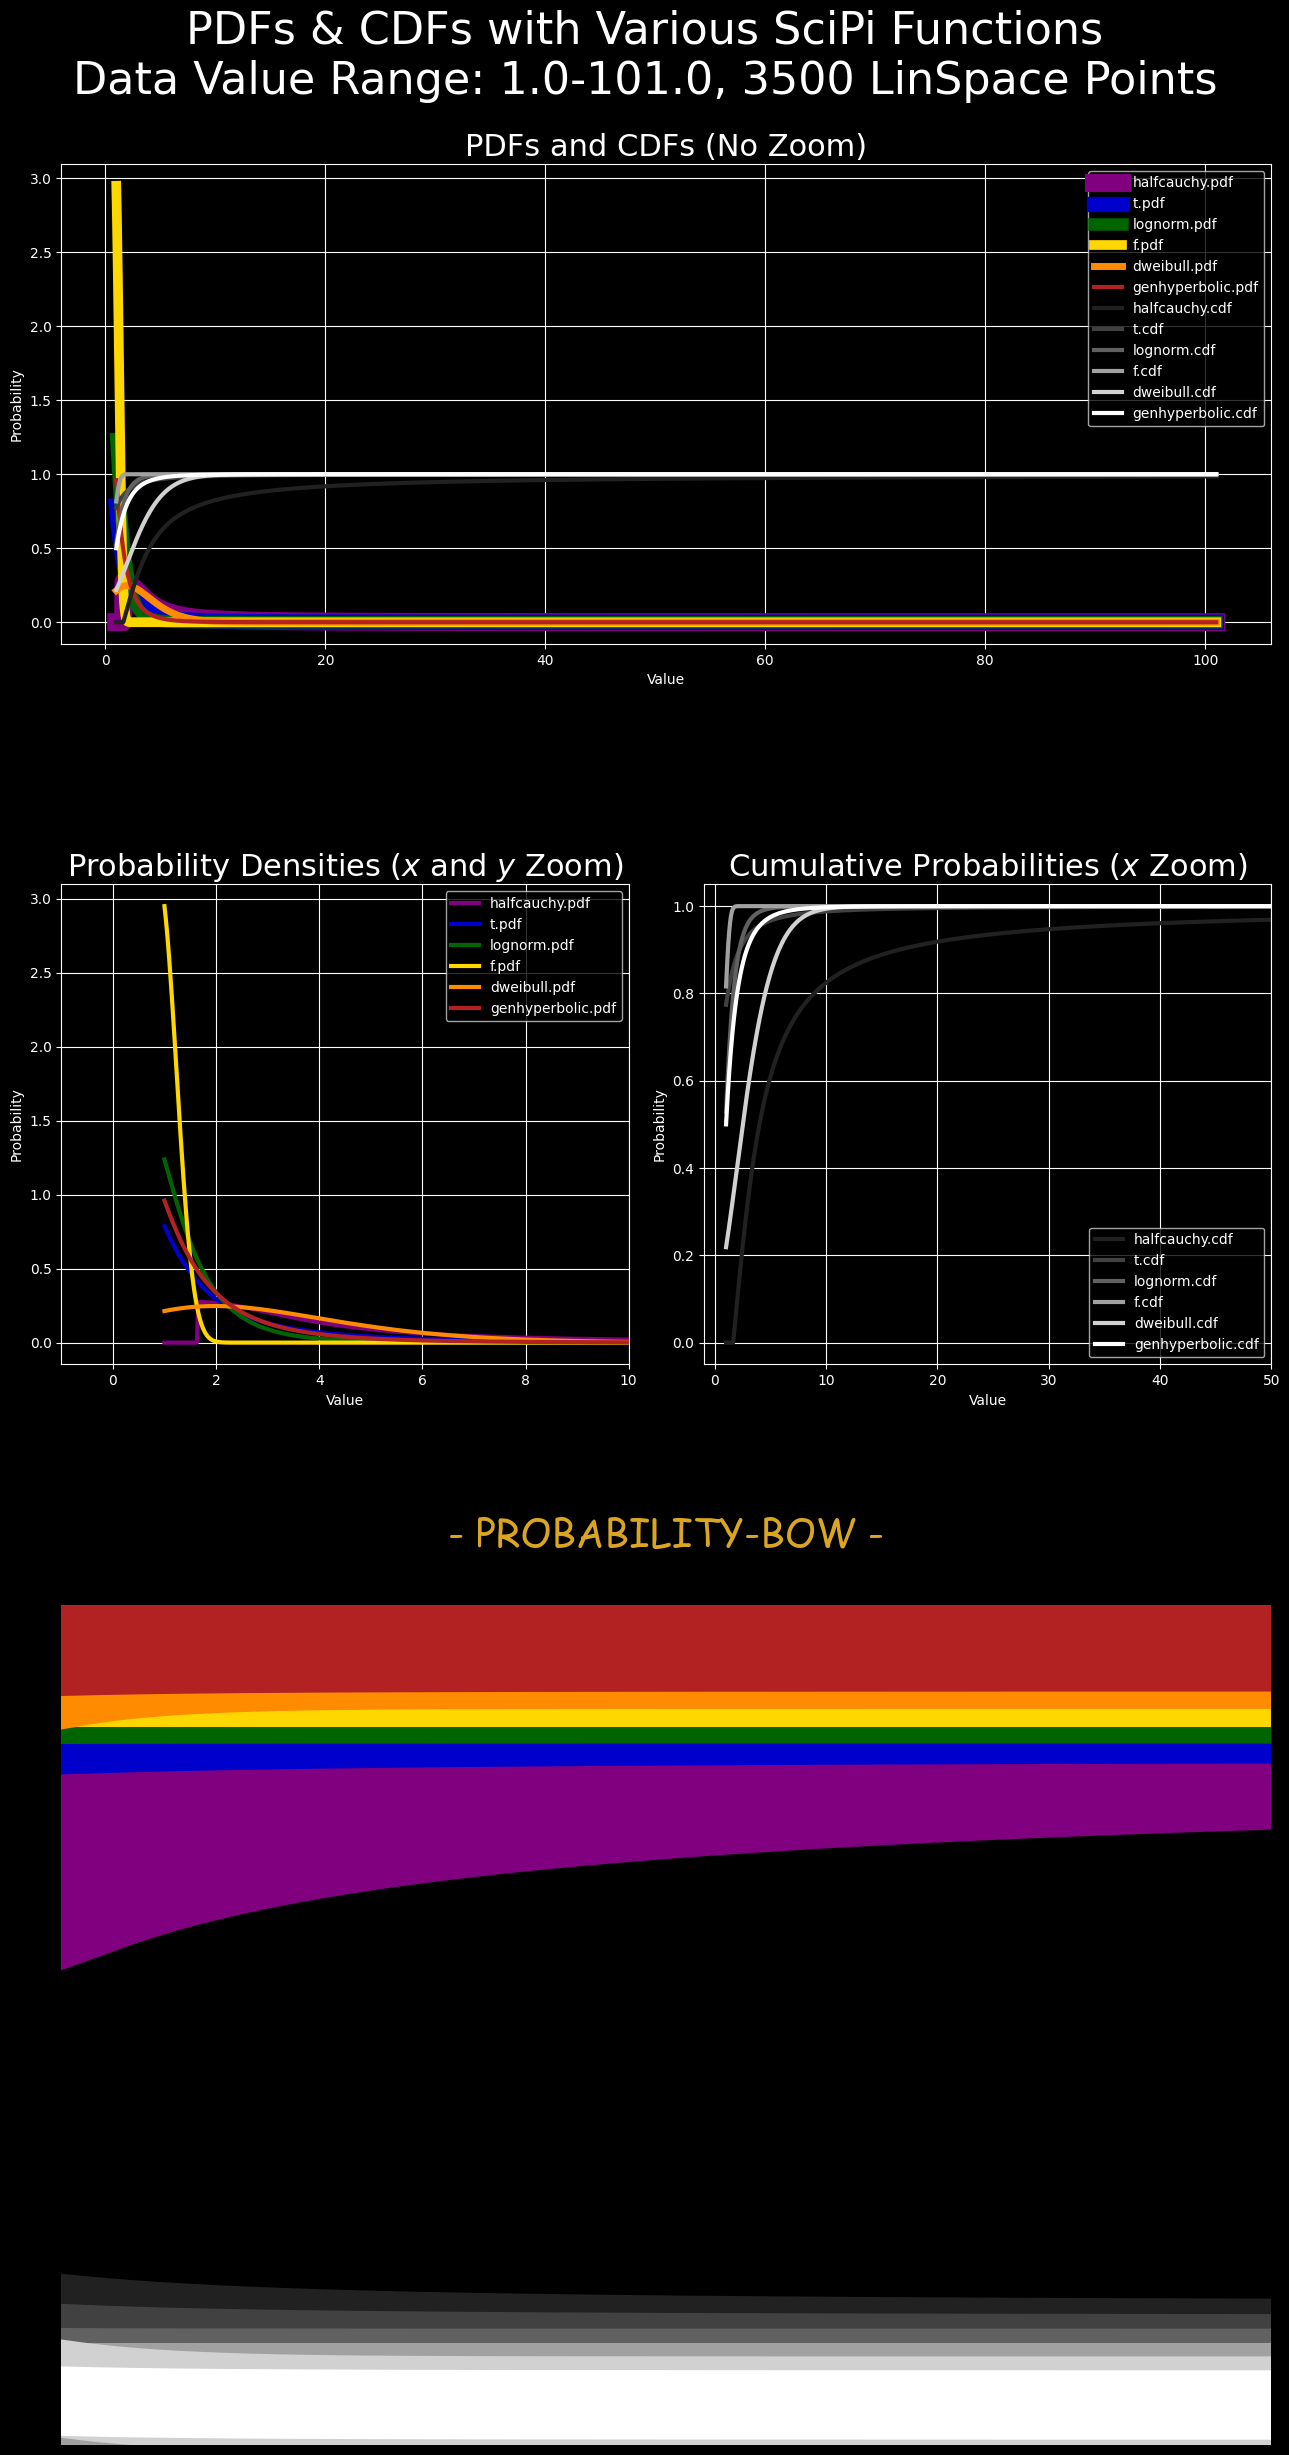

In [164]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from numpy import linspace
from numpy.random import rand, randint, randn
from scipy.stats import lognorm, genhyperbolic, dweibull, t, f, halfcauchy

N = 3500
x = linspace(1, 101, N)  # Domain for evaluating all distributions


# * * * # * * * #
#  PDF & CDF Processing Utilities
# * * * # * * * #
dx = x[1] - x[0]  # x-resolution used for PDF normalization


def normalize_pdf(dist):
    """
    Normalize a PDF so that the area under the curve sums to 1.

    :param dist: Numpy array representing the unnormalized PDF values
    :return: Normalized PDF array
    """
    return dist / sum(dist * dx)


def get_pdf_cdf(dist_func, *, x, normalize=True, **kwargs):
    """
    Generate normalized PDF and CDF for a given scipy.stats distribution.

    :param dist_func: A scipy.stats distribution (e.g., lognorm, t)
    :param x: Domain values to evaluate the PDF/CDF on
    :param normalize: Whether to normalize the PDF by area (default: True)
    :param kwargs: Distribution parameters (shape, loc, scale, etc.)
    :return: Tuple (pdf_array, cdf_array)

    The asterisk (*) in the argument list ensures that all arguments after it
    must be passed as keyword arguments. This improves readability and reduces
    the chance of passing values in the wrong order.
    """
    pdf = dist_func.pdf(x, **kwargs)
    cdf = dist_func.cdf(x, **kwargs)
    return (normalize_pdf(pdf) if normalize else pdf), cdf


def plot_dfs(ax, x, dftype, dfs, colors, labels, linewidths):
    """
    Plot multiple PDFs or CDFs on a given Axes object.

    :param ax: Matplotlib Axes object to plot on
    :param x: x-axis values
    :param dftype: 'pdf' or 'cdf' label for legend
    :param dfs: List of PDF or CDF arrays
    :param colors: Corresponding colors for each curve
    :param labels: Corresponding labels for each curve
    :param linewidths: Line widths for stylistic variation
    """
    for df, color, label, lw in zip(dfs, colors, labels, linewidths):
        ax.plot(x, df, c=color, label=f"{label}.{dftype}", lw=lw)


# * * * # * * * #
#  Random Parameter Generation for Each Distribution
# * * * # * * * #

# Lognormal distribution...
#  s: shape (>0); higher = more skew/right-tail-heavy:
lognorm_s = round(rand() * 2 + 0.1, 2)
lognorm_pdf, lognorm_cdf = get_pdf_cdf(lognorm, x=x, s=lognorm_s)

# Generalized Hyperbolic distribution...
#  a: shape (>0), b: skew (|b| < a), p: tail weight / kurtosis:
genh_a = round(rand() * 4 + 1, 2)
genh_b = round((rand() - 0.5) * 2 * (genh_a - 0.1), 2)
genh_p = round(randn() * 2, 2)
genhyperbolic_pdf, genhyperbolic_cdf = get_pdf_cdf(genhyperbolic, x=x, p=genh_a, a=genh_b, b=genh_p)

# Double Weibull distribution...
#  c: shape; controls peak sharpness vs spread:
dwei_c = round(rand() * 4.5 + 0.5, 2)
dweibull_pdf, dweibull_cdf = get_pdf_cdf(dweibull, x=x, c=dwei_c)

# Student's t-distribution...
#  df: degrees of freedom; lower df = fatter tails:
t_df = round(rand() * 10 + 1, 2)
t_pdf, t_cdf = get_pdf_cdf(t, x=x, df=t_df)

# F-distribution, params not equal for visual diversity...
#  dfn: degrees of freedom numerator (controls shape)
#  dfd: degrees of freedom denominator:
f_dfn = round(randint(1, 30), 2)
f_dfd = round(randint(1, 30), 2)
while f_dfd == f_dfn:
    f_dfd = round(randint(1, 30), 2)
f_pdf, f_cdf = get_pdf_cdf(f, x=x, dfn=f_dfn, dfd=f_dfd)

# Half-Cauchy distribution...
# - loc: shift; moves center
# - scale: stretch/compresses width (>0):
hc_loc = round(rand() * 5, 2)
hc_scale = round(rand() * 3 + 0.5, 2)
halfcauchy_pdf, halfcauchy_cdf = get_pdf_cdf(halfcauchy, x=x, loc=hc_loc, scale=hc_scale)

# Dictionary for reproducibility:
sp_dist_params = {
    "lognorm_s": lognorm_s,
    "genh_a": genh_a,
    "genh_b": genh_b,
    "genh_p": genh_p,
    "dwei_c": dwei_c,
    "t_df": t_df,
    "f_dfn": f_dfn,
    "f_dfd": f_dfd,
    "hc_loc": hc_loc,
    "hc_scale": hc_scale,
}

print(f"Parameters used in this analysis: {sp_dist_params}")

# * * * # * * * #
#  Plotting
# * * * # * * * #
RBOW_COLS = ["purple", "mediumblue", "darkgreen", "gold", "darkorange", "firebrick"]
BW_COLS = ["#212121", "#414141", "#616161", "#A1A1A1", "#D1D1D1", "#FFFFFF"]
FUNC_NAMES = ["halfcauchy", "t", "lognorm", "f", "dweibull", "genhyperbolic"]
MAIN_LWS = [3 for i in range(6)]

with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(13, 25))

    gs = GridSpec(7, 2, figure=fig)
    axes = [
        fig.add_subplot(gs[0:2, 0:]),
        fig.add_subplot(gs[2:4, 0]),
        fig.add_subplot(gs[2:4, 1]),
        fig.add_subplot(gs[4:, 0:]),
    ]

    # Combined PDF & CDF:
    plot_dfs(
        axes[0],
        x,
        "pdf",
        [halfcauchy_pdf, t_pdf, f_pdf, dweibull_pdf, genhyperbolic_pdf, lognorm_pdf],
        RBOW_COLS,
        FUNC_NAMES,
        [13, 11, 9, 7, 5, 3],
    )

    plot_dfs(
        axes[0],
        x,
        "cdf",
        [halfcauchy_cdf, t_cdf, f_cdf, dweibull_cdf, genhyperbolic_cdf, lognorm_cdf],
        BW_COLS,
        FUNC_NAMES,
        MAIN_LWS,
    )
    axes[0].set_title("PDFs and CDFs (No Zoom)", size=22)

    # PDF-only view:
    plot_dfs(
        axes[1],
        x,
        "pdf",
        [halfcauchy_pdf, t_pdf, f_pdf, dweibull_pdf, genhyperbolic_pdf, lognorm_pdf],
        RBOW_COLS,
        FUNC_NAMES,
        MAIN_LWS,
    )

    axes[1].set_title("Probability Densities ($x$ and $y$ Zoom)", size=22)
    axes[1].set_xlim(-1, 10)

    # CDF-only view:
    plot_dfs(
        axes[2],
        x,
        "cdf",
        [halfcauchy_cdf, t_cdf, f_cdf, dweibull_cdf, genhyperbolic_cdf, lognorm_cdf],
        BW_COLS,
        FUNC_NAMES,
        MAIN_LWS,
    )
    axes[2].set_xlim(-1, 50)
    axes[2].set_title("Cumulative Probabilities ($x$ Zoom)", size=22)

    # Common settings for first three subplots:
    for i in range(3):
        axes[i].set_ylabel("Probability")
        axes[i].set_xlabel("Value")
        axes[i].grid()
        axes[i].legend()

    # Final artistic composite plot (the "Probabilitybow"), switch cdf and
    #  pdf colors to have rainbow on top:
    plot_dfs(
        axes[3],
        x,
        "cdf",
        [halfcauchy_cdf, t_cdf, f_cdf, dweibull_cdf, genhyperbolic_cdf, lognorm_cdf],
        RBOW_COLS,
        FUNC_NAMES,
        linspace(250, 125, 6),
    )
    plot_dfs(
        axes[3],
        x,
        "pdf",
        [halfcauchy_pdf, t_pdf, f_pdf, dweibull_pdf, genhyperbolic_pdf, lognorm_pdf],
        BW_COLS,
        FUNC_NAMES,
        linspace(150, 50, 6),
    )
    axes[3].set_xlim(8, 25)
    axes[3].set_ylim(-0.05, 1.0)
    axes[3].set_axis_off()
    axes[3].set_title("\n\n- PROBABILITY-BOW -\n", color='goldenrod', size=28, fontfamily='cursive')

    plt.suptitle(
        (
            "PDFs & CDFs with Various SciPi Functions\n"
            f"Data Value Range: {min(x)}-{max(x)}, {N} LinSpace Points\n"
        ),
        size=32,
    )

    plt.tight_layout()
    plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">

## **_Wrap-Up:_**

The **PDF** shows where values are most dense

The **CDF** tells us something more actionable: how much probability has accumulated by a certain point.

By plotting the CDF, we can estimate how likely it is:

-   For a value to fall **BELOW** a threshold.

-   To fall **ABOVE** a threshold: $1 - \text{cdf}(x)$.

-   To fall **BETWEEN** two values: $\text{cdf}(b) - \text{cdf}(a)$.

We didn't compute these probabilities directly in this notebook's code, but by showing both PDF and CDF together, we built a visual framework to begin asking and answering these kinds of questions.

<hr style="height: 0; box-shadow: 0 0 5px 4px fuchsia; width: 100%; margin: 1.5rem auto;">
<hr style="height: 0; box-shadow: 0 0 5px 4px fuchsia; width: 100%; margin: 1.5rem auto;">
<hr style="height: 0; box-shadow: 0 0 5px 4px fuchsia; width: 100%; margin: 1.5rem auto;">

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 80%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px #5EDC1F; width: 70%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px orangered; width: 60%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px gold; width: 50%;">

<font size=2>

_Andrew Blais, Boston, Massachusetts_

GitHub: https://github.com/andrewblais

Website/Python Web Development Porfolio: https://www.andrewblais.dev/

</font>